Saúl Trujillo Rodríguez

### Importación de Librerías y Carga de Datos

Esta celda se encarga de importar todas las librerías necesarias para el análisis, como pandas para la manipulación de datos, scikit-learn para las tareas de preprocesamiento y modelado de machine learning (LabelEncoder, MinMaxScaler, PCA, KMeans, silhouette_score), numpy para operaciones numéricas, y matplotlib y scipy para visualizaciones y funciones científicas (clustering jerárquico).

Además, define la URL del repositorio donde se encuentra el archivo CSV con los datos de los clientes bancarios y carga este archivo en un DataFrame de pandas. Finalmente, extrae los nombres de las columnas del DataFrame original.

In [11]:
import pandas as pd # Librería para manipulación y análisis de datos
from sklearn.preprocessing import LabelEncoder # Para convertir etiquetas categóricas en numéricas
from sklearn import preprocessing # Módulo de preprocesamiento de scikit-learn
from sklearn.metrics import pairwise_distances # Nueva importación para calcular distancias
from sklearn.decomposition import PCA # Para Análisis de Componentes Principales
import numpy as np # Librería para operaciones numéricas, especialmente con arrays
from sklearn.cluster import KMeans # Algoritmo de clustering K-Means
from sklearn.metrics import silhouette_score # Para calcular el coeficiente de Silhouette
import matplotlib.pyplot as plt # Para la creación de gráficos y visualizaciones


# URL del archivo CSV que contiene el dataset
repositorio = 'https://raw.githubusercontent.com/Saultr21/IA-Y-BIGDATA/refs/heads/main/SNS/SNS_ACT4_1/bank.csv'


# Carga del dataset desde la URL, especificando que el separador es ';'
df_clients_origen = pd.read_csv(repositorio, sep=';')
# Obtención de los nombres de las columnas del DataFrame original
columns =df_clients_origen.columns.values

### Visualización Inicial del DataFrame Original

Esta celda muestra las primeras y últimas filas del DataFrame `df_clients_origen` tal como se cargó, permitiendo una inspección rápida de los datos y su estructura.

In [2]:
# Muestra el DataFrame df_clients_origen
# Por defecto, pandas muestra las primeras y últimas filas si el DataFrame es grande.
df_clients_origen

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Conteo de Valores Únicos por Columna

El siguiente código itera sobre cada columna del DataFrame `df_clients_origen` y calcula e imprime el número de valores únicos presentes en esa columna. Esto es útil para entender la cardinalidad de cada característica, especialmente para identificar variables categóricas y la diversidad de sus valores.

In [3]:
# Itera sobre cada nombre de columna en el DataFrame original
for columna in df_clients_origen.columns:
    # Calcula el número de valores únicos para la columna actual
    num_valores_unicos = df_clients_origen[columna].nunique()
    # Imprime el nombre de la columna y su cantidad de valores únicos
    print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna age: 67
Número de valores únicos en la columna job: 12
Número de valores únicos en la columna marital: 3
Número de valores únicos en la columna education: 4
Número de valores únicos en la columna default: 2
Número de valores únicos en la columna balance: 2353
Número de valores únicos en la columna housing: 2
Número de valores únicos en la columna loan: 2
Número de valores únicos en la columna contact: 3
Número de valores únicos en la columna day: 31
Número de valores únicos en la columna month: 12
Número de valores únicos en la columna duration: 875
Número de valores únicos en la columna campaign: 32
Número de valores únicos en la columna pdays: 292
Número de valores únicos en la columna previous: 24
Número de valores únicos en la columna poutcome: 4
Número de valores únicos en la columna y: 2


### Selección de Columnas Relevantes

En esta celda, se define una lista llamada `columns_selected` que contiene los nombres de las columnas consideradas relevantes para el análisis de segmentación. Luego, se crea un nuevo DataFrame, `df_clients`, que es un subconjunto del DataFrame original `df_clients_origen`, conteniendo únicamente estas columnas seleccionadas. Finalmente, se muestra este nuevo DataFrame.

In [4]:
# Lista de nombres de las columnas que se seleccionarán para el análisis
columns_selected = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',  'duration','campaign', 'poutcome', 'y']

# Creación de un nuevo DataFrame 'df_clients' que contiene solo las columnas seleccionadas del DataFrame original
df_clients = df_clients_origen[columns_selected]
# Muestra el DataFrame 'df_clients' con las columnas seleccionadas
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,79,1,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,220,1,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,185,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,199,4,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,226,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,329,5,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,153,1,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,151,11,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,129,4,other,no


## Justificación del Dataset

El dataset "Bank Marketing" es ampliamente utilizado y reconocido en la comunidad de machine learning para tareas de clasificación y segmentación de clientes. Proviene de campañas de marketing directo de una entidad bancaria portuguesa.

**Relevancia para el estudio:**
*   **Objetivo claro:** El objetivo principal de las campañas era que los clientes suscribieran un depósito a plazo. Esto nos da una variable objetivo clara (`y`) para analizar la efectividad de la segmentación.
*   **Características ricas:** Incluye información demográfica del cliente (edad, trabajo, estado civil, educación), datos relacionados con el contacto de la campaña actual (tipo de contacto, duración) y resultados de campañas anteriores (poutcome).
*   **Aplicabilidad:** Los insights obtenidos pueden ser directamente aplicables para optimizar futuras campañas de marketing, identificar perfiles de clientes más propensos a la conversión y personalizar ofertas.
*   **Desafío:** Presenta una mezcla de variables numéricas y categóricas, lo que requiere un preprocesamiento adecuado, y el desbalance de clases (más clientes no suscriben que los que sí) es un problema común en marketing que se puede explorar.

Este dataset permite aplicar diversas técnicas de clustering para identificar grupos homogéneos de clientes y, posteriormente, analizar cómo estos grupos se relacionan con la variable objetivo, proporcionando información valiosa para la toma de decisiones estratégicas en el banco.

### Conversión de Variables Categóricas a Numéricas

Las variables categóricas (texto) necesitan ser convertidas a un formato numérico para que los algoritmos de machine learning puedan procesarlas. Esta celda utiliza `LabelEncoder` de scikit-learn para transformar las siguientes columnas categóricas del DataFrame `df_clients` en representaciones numéricas: 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', y 'y'. El `LabelEncoder` asigna un número entero único a cada categoría dentro de una columna. La opción `pd.options.mode.copy_on_write = True` se establece para evitar un `SettingWithCopyWarning`. Finalmente, se muestra el DataFrame modificado.

In [5]:
# Conversión de variables catgóricas a numéricas
# Instanciación del LabelEncoder
le = LabelEncoder()

# Configuración de pandas para evitar el SettingWithCopyWarning al modificar el DataFrame
pd.options.mode.copy_on_write = True 

# Aplicación del LabelEncoder a cada columna categórica seleccionada
df_clients['job'] = le.fit_transform(df_clients['job'])
df_clients['marital'] = le.fit_transform(df_clients['marital'])
df_clients['education'] = le.fit_transform(df_clients['education'])
df_clients['housing'] = le.fit_transform(df_clients['housing'])
df_clients['loan'] = le.fit_transform(df_clients['loan'])
df_clients['contact'] = le.fit_transform(df_clients['contact'])
df_clients['poutcome'] = le.fit_transform(df_clients['poutcome']) 
df_clients['y'] = le.fit_transform(df_clients['y']) # Variable objetivo

# Muestra el DataFrame 'df_clients' después de la codificación de etiquetas
df_clients

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,y
0,30,10,1,0,1787,0,0,0,79,1,3,0
1,33,7,1,1,4789,1,1,0,220,1,0,0
2,35,4,2,2,1350,1,0,0,185,1,0,0
3,30,4,1,2,1476,1,1,2,199,4,3,0
4,59,1,1,1,0,1,0,2,226,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,-333,1,0,0,329,5,3,0
4517,57,6,1,2,-3313,1,1,2,153,1,3,0
4518,57,9,1,1,295,0,0,0,151,11,3,0
4519,28,1,1,1,1137,0,0,0,129,4,1,0


## Transformación de los datos



### Escalado de Características (Normalización Min-Max)

Después de convertir las variables categóricas a numéricas, es importante escalar las características, especialmente cuando se utilizan algoritmos basados en distancia como K-Means o clustering jerárquico. El escalado Min-Max transforma cada característica para que se encuentre en un rango específico, comúnmente [0, 1]. Esto asegura que todas las características contribuyan de manera equitativa al cálculo de distancias, evitando que aquellas con rangos de valores más amplios dominen sobre otras.

Esta celda utiliza `MinMaxScaler` de `sklearn.preprocessing` para escalar todas las columnas del DataFrame `df_clients`. El resultado, `clients_scaled`, es una matriz NumPy con los datos escalados.

In [6]:
# Instanciación del MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
# Aplicación del escalador Min-Max al DataFrame 'df_clients'
# fit_transform ajusta el escalador a los datos y luego los transforma
clients_scaled = min_max_scaler.fit_transform(df_clients)
# Muestra la matriz NumPy 'clients_scaled' con los datos normalizados
clients_scaled

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55882353, 0.81818182, 0.5       , ..., 0.20408163, 1.        ,
        0.        ],
       [0.13235294, 0.09090909, 0.5       , ..., 0.06122449, 0.33333333,
        0.        ],
       [0.36764706, 0.18181818, 1.        , ..., 0.02040816, 0.33333333,
        0.        ]], shape=(4521, 12))

### Reducción de Dimensionalidad con PCA

El Análisis de Componentes Principales (PCA) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos, conservando la mayor cantidad de varianza posible. En esta celda, se aplica PCA a los datos escalados (`clients_scaled`) para reducirlos a dos componentes principales. Esto facilita la visualización de los datos en un gráfico 2D.

Se imprime la varianza explicada por cada uno de los dos componentes seleccionados, lo que indica cuánta información original capturan estos nuevos componentes. Además, se muestra un DataFrame que detalla la "importancia" o contribución de cada variable original a los dos componentes principales calculados.

In [7]:
# Instanciación de PCA, especificando que queremos reducir a 2 componentes
pca = PCA(n_components = 2)
# Aplicación de PCA a los datos escalados 'clients_scaled'
# fit_transform ajusta PCA a los datos y luego los transforma a las nuevas dimensiones
X_pca = pca.fit_transform(clients_scaled)
# Muestra el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

# Creación de un DataFrame para visualizar la "importancia" (component loadings) 
# de cada variable original en los nuevos componentes principales (PC-1, PC-2).
# pca.components_ contiene los vectores de los componentes principales. Se transpone para que las variables originales sean filas.
df_pca_components = pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df_clients.columns)
# Muestra el DataFrame con la contribución de cada variable original a los componentes principales
df_pca_components

Varianza explicada por cada componente: [0.26445274 0.18531217]


,PC-1,PC-2
age,-0.040490,0.055506
job,-0.114728,0.022419
marital,-0.050828,-0.061621
education,-0.081631,-0.036904
balance,-0.003900,0.001125
housing,0.806814,-0.537082
loan,0.029657,-0.002243
contact,0.547678,0.715328
duration,-0.004461,-0.008826
campaign,0.001596,0.007281


### Visualización de Datos Tras PCA

Esta celda utiliza `matplotlib.pyplot` para crear un gráfico de dispersión de los datos de los clientes después de haber sido transformados por PCA a dos dimensiones (`X_pca`). Cada punto 'x' en el gráfico representa un cliente en el nuevo espacio de dos dimensiones. Se establecen límites para los ejes X e Y, se añade un título al gráfico y una cuadrícula para facilitar la lectura. Esto permite una inspección visual de la distribución de los datos en un espacio reducido.

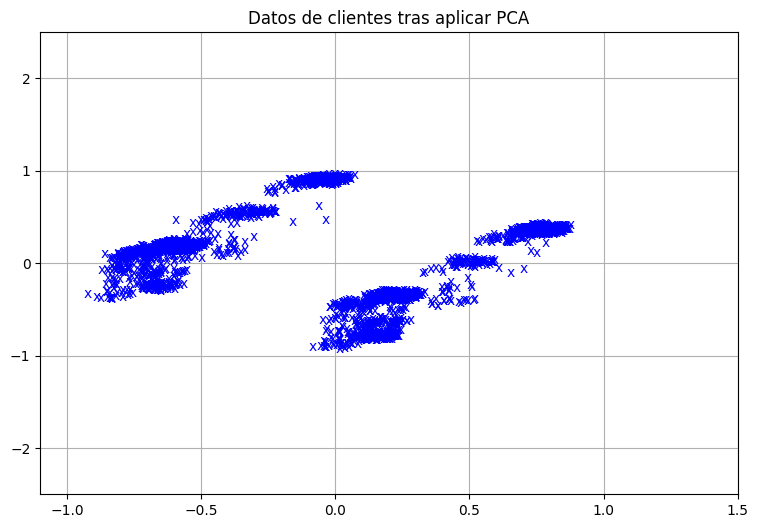

In [8]:
# Importación de matplotlib.pyplot si no se ha hecho antes (aunque ya está importado globalmente)
# import matplotlib.pyplot as plt

# Creación de una nueva figura para el gráfico con un tamaño específico
plt.figure(figsize=(9, 6))
# Itera sobre cada punto de datos en la matriz X_pca (datos transformados por PCA)
for i in range(len(X_pca)):
    # Dibuja cada punto (cliente) como una 'x' azul en las coordenadas PCA
    # X_pca[i][0] es la coordenada en el primer componente principal
    # X_pca[i][1] es la coordenada en el segundo componente principal
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")

# Establece los límites para el eje X
plt.xlim(-1.1, 1.5)
# Establece los límites para el eje Y
plt.ylim(-2.5, 2.5)
# Añade un título al gráfico
plt.title("Datos de clientes tras aplicar PCA")
# Añade una cuadrícula al gráfico para facilitar la visualización
plt.grid()
# Muestra el gráfico
plt.show()

### Ejecución del algoritmo de clustering jerárquico

Dado que la mayor parte de los datos no están muy concentrados y el resto parecen valores atípicos, es mejor utilizar como distancia intercluster el **vecino más próximo** (single). Las opciones más recomendadas para este problema van desde el **vecino más alejado** (complete) hasta la **mínima varianza** (ward).

Utilizaremos como distancia el vecino más cercano (single) ya que nos permitirá dividir los grupos más grandes. Se establece un umbral (threshold) de $15$ como distancia a partir de la cual se considerará que los grupos a distancia mayor son grupos independientes (y por lo tanto no se agruparan).


### Aplicación de Clustering Jerárquico y Visualización del Dendrograma

Esta celda realiza los siguientes pasos para aplicar el clustering jerárquico:
1.  **Cálculo de la Matriz de Distancias:** Utiliza `pairwise_distances` de `sklearn.metrics` para calcular la matriz de distancias euclidianas (`D`) entre todos los pares de puntos en los datos escalados (`clients_scaled`). También calcula y muestra la distancia media.
2.  **Construcción del Dendrograma:** Utiliza `linkage` de `scipy.cluster.hierarchy` para realizar el clustering jerárquico. Se elige el método 'single' (vecino más próximo) para calcular la distancia entre clusters. Luego, se utiliza `dendrogram` para visualizar la jerarquía de clusters. Se establece un `color_threshold` de 0.8 para colorear las ramas del dendrograma según el umbral de corte.

El dendrograma ayuda a decidir el número de clusters o el umbral de corte para la segmentación.

Distancia Media	   1.41


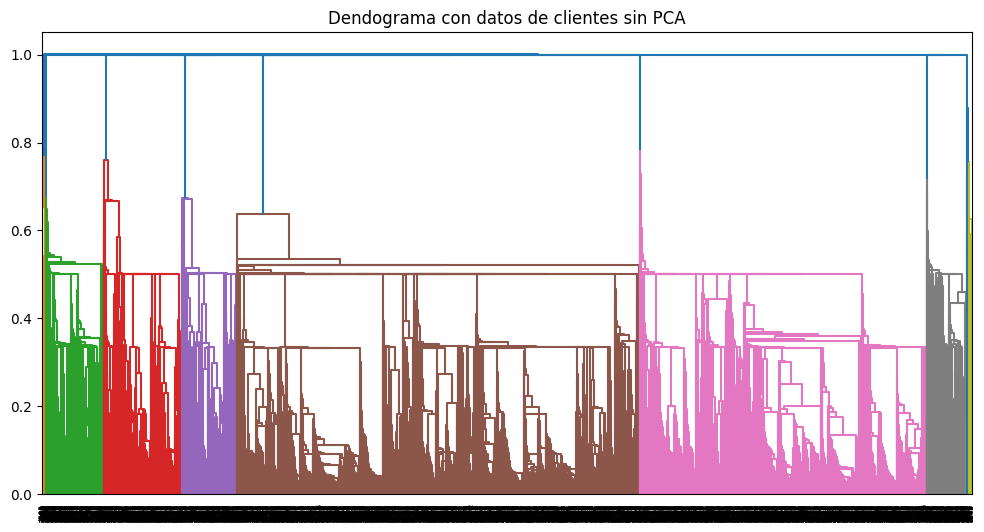

In [16]:
## Clustering jerárquico
# 1. Obtener la matriz de distancia entre todos los elementos
# Calcula la matriz de distancias por pares para los datos escalados usando la métrica euclidiana
D = pairwise_distances(clients_scaled, metric='euclidean')
# Calcula la distancia media entre los puntos
avD = np.average(D)
# Imprime la distancia media formateada
print("Distancia Media\t {:6.2f}".format(avD))

# 2. Constuimos el dendograma
from scipy import cluster # Importa el módulo de clustering de SciPy
# Crea una figura para el dendrograma con un tamaño específico
plt.figure(figsize=(12, 6))
# linkage debe usar los datos escalados originales o una matriz de distancias condensada.
# Usar clients_scaled directamente es estándar y calcula las distancias euclidianas correctamente.
clusters = cluster.hierarchy.linkage(clients_scaled, method='single', metric='euclidean') 
# Dibuja el dendrograma.
# 'clusters' es la matriz de linkage generada.
# 'color_threshold=0.8' colorea los clusters por debajo de esta distancia de corte.
cluster.hierarchy.dendrogram(clusters, color_threshold=0.8)
# Añade un título al dendrograma
plt.title("Dendograma con datos de clientes sin PCA")
# Muestra el dendrograma
plt.show()

Tras realizar el corte a una distancia de $0.8$ utilizando distancia intercluster el vecino más alejado (complete), obtenemos $7$ grupos. Este nivel de corte debe realizarse ad-hoc en un nível que consideremos lógico. En este caso concreto, vemos que realizar este corte nos da unos cuantos outiliers (grupos de un solo elemento).

A continuación vamos a obtener un vector (*labels*) que, dada una distancia de corte (*threshold*) y un criterio de distancia intercluster, contenga el grupo al que pertece cada elemento.

### Obtención de Etiquetas de Cluster

Después de construir la jerarquía de clusters (representada en la variable `clusters` de la celda anterior), esta celda utiliza la función `fcluster` de `scipy.cluster.hierarchy` para "cortar" el dendrograma a un nivel específico y asignar a cada observación (cliente) una etiqueta de cluster.

Se establece un `threshold` (umbral) de 0.8 y se utiliza el criterio `'distance'`. Esto significa que cualquier fusión en el dendrograma que ocurra a una distancia mayor a 0.8 resultará en clusters separados. El vector `labels` contendrá el ID del cluster al que pertenece cada observación. Finalmente, se imprime el número total de clusters distintos obtenidos y se muestra el vector `labels`.

In [17]:
# 3. Obtenemos el grupo al que pertenece cada observación
# Define el umbral de distancia para cortar el dendrograma. Este valor es ad-hoc.
threshold = 0.8
# Aplica el corte al dendrograma ('clusters') usando el umbral y el criterio de distancia.
# 'labels' será un array donde cada elemento es el ID del cluster para la observación correspondiente.
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# Calcula el número de clusters únicos obtenidos contando los diferentes valores en 'labels'.
num_clusters_obtenidos = len(set(labels))
# Imprime el número de clusters.
print("Número de clusters {}".format(num_clusters_obtenidos))
# Muestra el array 'labels' con las asignaciones de cluster para cada cliente.
labels

Número de clusters 9


array([6, 3, 5, ..., 6, 6, 3], shape=(4521,), dtype=int32)

Ahora podemos volver a representar gráficamente los datos del PCA (en dos dimensiones) pero introduciendo como color los resultados de las etiquetas. Se puede ver que el clustering no ha quedado nada mal, los resultados son coherentes.

### Visualización de Clusters en el Espacio PCA

Esta celda visualiza los resultados del clustering en el espacio 2D obtenido mediante PCA. Cada punto (cliente) se colorea según la etiqueta de cluster asignada en la celda anterior (`labels`).

Se define un array de colores `colores` para asignar un color diferente a cada cluster. Luego, se crea un gráfico de dispersión similar al de la visualización PCA, pero esta vez, el color de cada punto 'x' está determinado por su cluster. Esto permite observar cómo se distribuyen los clusters en las dos dimensiones principales y evaluar visualmente la separación y cohesión de los grupos.

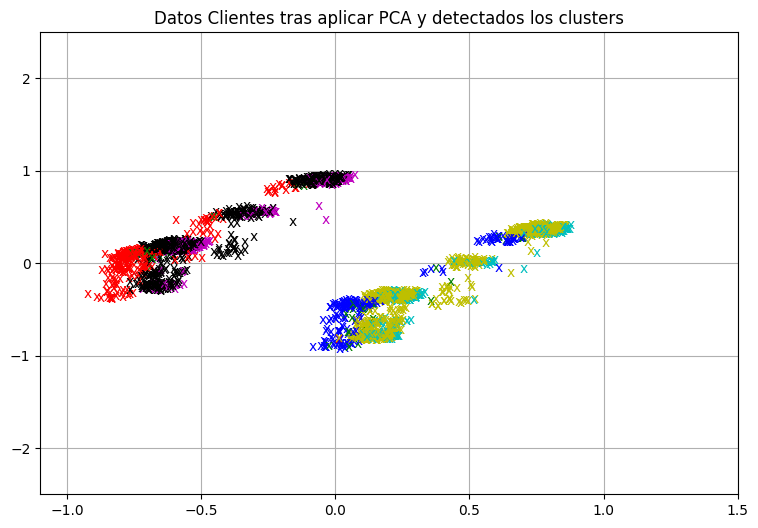

In [18]:
# Define una secuencia de colores para asignar a los diferentes clusters.
# Se repite para asegurar suficientes colores si hay muchos clusters.
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk']) # b:blue, g:green, r:red, c:cyan, m:magenta, y:yellow, k:black
colores = np.hstack([colores] * 20) # Repite la secuencia de colores 20 veces

# Crea una nueva figura para el gráfico con un tamaño específico.
plt.figure(figsize=(9, 6))
# Itera sobre cada punto de datos en la matriz X_pca (datos transformados por PCA).
for i in range(len(X_pca)):
    # Dibuja cada punto (cliente) como una 'x'.
    # El color de la 'x' se toma del array 'colores' usando la etiqueta del cluster 'labels[i]' como índice.
    # X_pca[i][0] es la coordenada en el primer componente principal.
    # X_pca[i][1] es la coordenada en el segundo componente principal.
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])

# Establece los límites para el eje X.
plt.xlim(-1.1, 1.5)
# Establece los límites para el eje Y.
plt.ylim(-2.5, 2.5)
# Añade una cuadrícula al gráfico.
plt.grid()
# Añade un título al gráfico.
plt.title("Datos Clientes tras aplicar PCA y detectados los clusters")
# Muestra el gráfico.
plt.show()

## Determinación del Número Óptimo de Clusters: Coeficiente de Silhouette

El Coeficiente de Silhouette es una métrica utilizada para evaluar la calidad de los clusters formados. Mide cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El valor del coeficiente varía entre -1 y 1.

*   Un valor cercano a +1 indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos.
*   Un valor cercano a 0 indica que el objeto está en el límite entre dos clusters.
*   Un valor cercano a -1 indica que el objeto probablemente ha sido asignado al cluster incorrecto.

Calcularemos el coeficiente de Silhouette promedio para diferentes números de clusters (k) y elegiremos el k que maximice este valor, o un k que represente un buen equilibrio entre cohesión y separación. Para el clustering jerárquico, podemos probar diferentes umbrales de corte o números de clusters directamente si el método lo permite. En este caso, como ya hemos aplicado un corte y obtenido `labels`, podemos calcular el Silhouette Score para esa configuración. Para una exploración más exhaustiva, podríamos variar el `threshold` y recalcular.

Sin embargo, para ilustrar cómo se usaría para *determinar* k, aplicaremos K-Means (como ejemplo, ya que es más directo para probar diferentes k) sobre los datos escalados `clients_scaled` y evaluaremos con Silhouette.

### Cálculo del Coeficiente de Silhouette para K-Means y Clustering Jerárquico

Esta celda tiene dos propósitos principales:
1.  **Determinar un número óptimo de clusters para K-Means:** Itera a través de un rango de posibles números de clusters (de 2 a 10). Para cada número `k`, aplica el algoritmo K-Means a los datos escalados (`clients_scaled`), predice las etiquetas de los clusters y calcula el coeficiente de Silhouette promedio. Los resultados se almacenan y luego se grafican para visualizar cómo varía el Silhouette Score con `k`. El `k` que maximiza el Silhouette Score es a menudo una buena elección.
2.  **Evaluar el clustering jerárquico existente:** Calcula el coeficiente de Silhouette promedio para las etiquetas de cluster (`labels`) obtenidas previamente mediante el clustering jerárquico. Esto proporciona una medida cuantitativa de la calidad de la segmentación jerárquica realizada.

Se utiliza `KMeans` y `silhouette_score` de `sklearn.cluster` y `sklearn.metrics`, respectivamente.

Para n_clusters = 2, el coeficiente de Silhouette promedio es : 0.2503
Para n_clusters = 3, el coeficiente de Silhouette promedio es : 0.2587
Para n_clusters = 3, el coeficiente de Silhouette promedio es : 0.2587
Para n_clusters = 4, el coeficiente de Silhouette promedio es : 0.2709
Para n_clusters = 4, el coeficiente de Silhouette promedio es : 0.2709
Para n_clusters = 5, el coeficiente de Silhouette promedio es : 0.2757
Para n_clusters = 5, el coeficiente de Silhouette promedio es : 0.2757
Para n_clusters = 6, el coeficiente de Silhouette promedio es : 0.2675
Para n_clusters = 6, el coeficiente de Silhouette promedio es : 0.2675
Para n_clusters = 7, el coeficiente de Silhouette promedio es : 0.2956
Para n_clusters = 7, el coeficiente de Silhouette promedio es : 0.2956
Para n_clusters = 8, el coeficiente de Silhouette promedio es : 0.2675
Para n_clusters = 8, el coeficiente de Silhouette promedio es : 0.2675
Para n_clusters = 9, el coeficiente de Silhouette promedio es : 0.2425
Para n

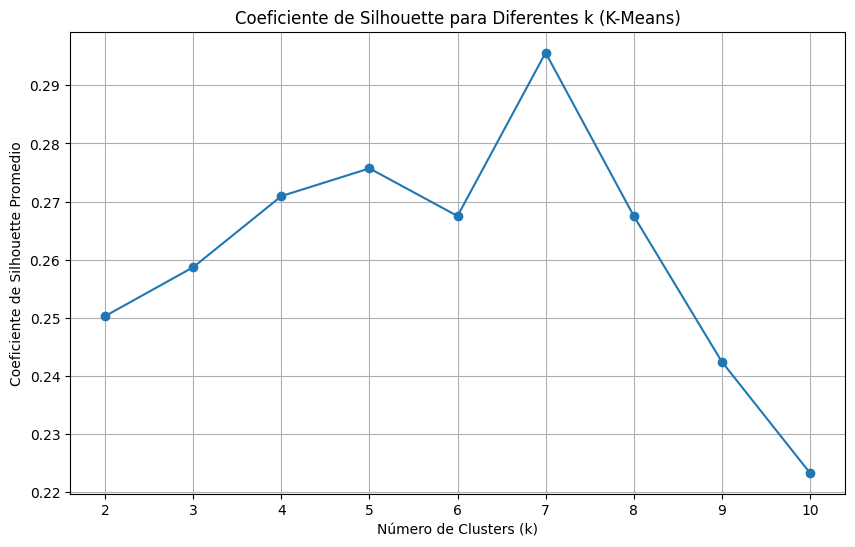


El coeficiente de Silhouette promedio para el clustering jerárquico (con 9 clusters) es: 0.2812


In [19]:
# Vamos a probar K-Means con diferentes números de clusters sobre los datos escalados
# y calcular el Silhouette Score para cada uno.

# Lista para almacenar los coeficientes de Silhouette para cada k
silhouette_scores = []
# Rango de valores de k (número de clusters) que se probarán
possible_k_values = range(2, 11)  # Probaremos de 2 a 10 clusters

# Itera sobre cada valor posible de k
for k in possible_k_values:
    # Instancia KMeans con el número actual de clusters (k), estado aleatorio para reproducibilidad, y n_init='auto' para la inicialización.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Ajusta KMeans a los datos escalados y predice las etiquetas de los clusters.
    cluster_labels_kmeans = kmeans.fit_predict(clients_scaled)
    # Calcula el coeficiente de Silhouette promedio para las etiquetas predichas.
    silhouette_avg = silhouette_score(clients_scaled, cluster_labels_kmeans)
    # Añade el Silhouette Score a la lista.
    silhouette_scores.append(silhouette_avg)
    # Imprime el Silhouette Score para el valor actual de k.
    print(f"Para n_clusters = {k}, el coeficiente de Silhouette promedio es : {silhouette_avg:.4f}")

# Graficar los Silhouette Scores
# Crea una nueva figura para el gráfico.
plt.figure(figsize=(10, 6))
# Dibuja los Silhouette Scores contra los valores de k.
plt.plot(possible_k_values, silhouette_scores, marker='o')
# Añade un título al gráfico.
plt.title('Coeficiente de Silhouette para Diferentes k (K-Means)')
# Etiqueta el eje X.
plt.xlabel('Número de Clusters (k)')
# Etiqueta el eje Y.
plt.ylabel('Coeficiente de Silhouette Promedio')
# Añade una cuadrícula al gráfico.
plt.grid(True)
# Muestra el gráfico.
plt.show()

# También podemos calcular el Silhouette Score para el clustering jerárquico que ya hicimos:
# Calcula el Silhouette Score para las etiquetas 'labels' obtenidas del clustering jerárquico.
silhouette_avg_hierarchical = silhouette_score(clients_scaled, labels)
# Imprime el Silhouette Score para el clustering jerárquico.
print(f"\nEl coeficiente de Silhouette promedio para el clustering jerárquico (con {len(set(labels))} clusters) es: {silhouette_avg_hierarchical:.4f}")

## Exportar Resultados a csv

Una vez que tenemos las asignaciones de clusters para cada cliente, es útil exportar esta información junto con los datos originales (o los datos preprocesados) para un análisis más detallado o para compartir con otros equipos.

### Adición de Etiquetas de Cluster al DataFrame y Exportación a Excel

Esta celda toma el DataFrame `df_clients` (que contiene los datos preprocesados antes del escalado pero después del LabelEncoding) y le añade una nueva columna llamada `cluster_id_hierarchical`. Esta nueva columna contiene las etiquetas de cluster (`labels`) obtenidas del algoritmo de clustering jerárquico.

In [20]:
# Añadir las etiquetas de los clusters al dataframe original (o al preprocesado df_clients)
# Asegurémonos de que el índice coincida si df_clients fue modificado.
# Como 'labels' se generó a partir de 'clients_scaled', que a su vez vino de 'df_clients',
# el orden debería ser el mismo.

# Crea una copia del DataFrame 'df_clients' para no modificar el original directamente.
df_clients_clustered = df_clients.copy()
# Añade una nueva columna 'cluster_id_hierarchical' al DataFrame copiado,
# asignándole las etiquetas de cluster obtenidas del clustering jerárquico.
df_clients_clustered['cluster_id_hierarchical'] = labels

# Mostrar las primeras filas con el ID del cluster para verificar.
print("DataFrame con IDs de cluster:")
print(df_clients_clustered.head())

# Exportar a un archivo csv
try:
    # Intenta exportar el DataFrame 'df_clients_clustered' a un archivo Excel.
    # 'index=False' evita que el índice del DataFrame se escriba como una columna en el csv.
    df_clients_clustered.to_csv("resultados_segmentacion_clientes.csv", index=False)
    print("\nResultados exportados a 'resultados_segmentacion_clientes.csv'")
except Exception as e:
    # Si ocurre un error durante la exportación (ej. librería faltante), se captura y se informa.
    print(f"\nError al exportar a csv: {e}")
    


DataFrame con IDs de cluster:
   age  job  marital  education  balance  housing  loan  contact  duration  \
0   30   10        1          0     1787        0     0        0        79   
1   33    7        1          1     4789        1     1        0       220   
2   35    4        2          2     1350        1     0        0       185   
3   30    4        1          2     1476        1     1        2       199   
4   59    1        1          1        0        1     0        2       226   

   campaign  poutcome  y  cluster_id_hierarchical  
0         1         3  0                        6  
1         1         0  0                        3  
2         1         0  0                        5  
3         4         3  0                        3  
4         1         3  0                        5  

Resultados exportados a 'resultados_segmentacion_clientes.csv'
